In [180]:
import numpy as np
import matplotlib.pyplot as plt

#(4.1) Frequency analysis of signals

Given a sampling frequency, f_A=10 kHz and a signal length of 2000 samples. Create the corresponding variables, as well as the resulting sampling interval and the corresponding time vector.




#####(a) Create the following oscillations:


* A cosine oscillation cos⁡(2πf_0 kT_A ) with frequency f_(0 )= 100 Hz and
  amplitude 50.

* A sine oscillation sin⁡(2πf_0 kT_A ) with frequency f_(0 )= 300 Hz and
   amplitude 100
* A sinusoidal oscillation sin⁡(2πf_0 kT_A ) with the frequency f_(0 )= 700 Hz and the amplitude 200







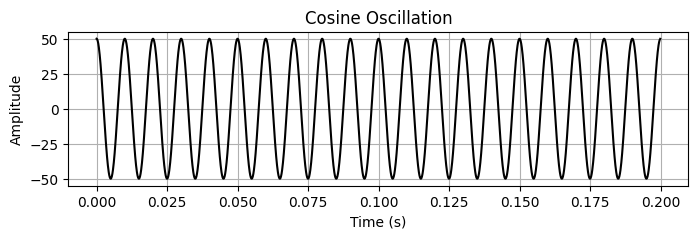

In [21]:


# Given parameters
f0_1 = 100  # Frequency of the cosine oscillation in Hz
A1 = 50     # Amplitude of the cosine oscillation
f_A = 10000 # Sampling frequency
N = 2000    # Number of samples

# Create time vector
t = np.arange(N) / f_A

# Create cosine oscillation
x_1 = A1 * np.cos(2 * np.pi * f0_1 * t)

# Plot the cosine oscillation
plt.figure(figsize=(8, 2))
plt.plot(t, x_1, label='Cosine Oscillation (100 Hz)', color='black')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Cosine Oscillation')
plt.grid(True)
plt.show()


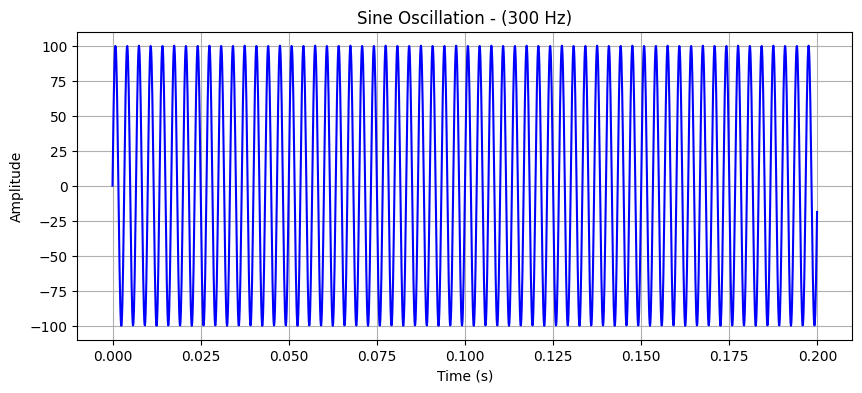

In [22]:


# Given parameters
f0_2 = 300  # Frequency of the sine oscillation in Hz
A2 = 100    # Amplitude of the sine oscillation
f_A = 10000 # Sampling frequency in Hz
N = 2000    # Number of samples

# Create time vector
t = np.arange(N) / f_A

# Create sine oscillation
x_2 = A2 * np.sin(2 * np.pi * f0_2 * t)

# Plot the sine oscillation
plt.figure(figsize=(10, 4))
plt.plot(t, x_2, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Oscillation - (300 Hz)')
plt.grid(True)
plt.show()


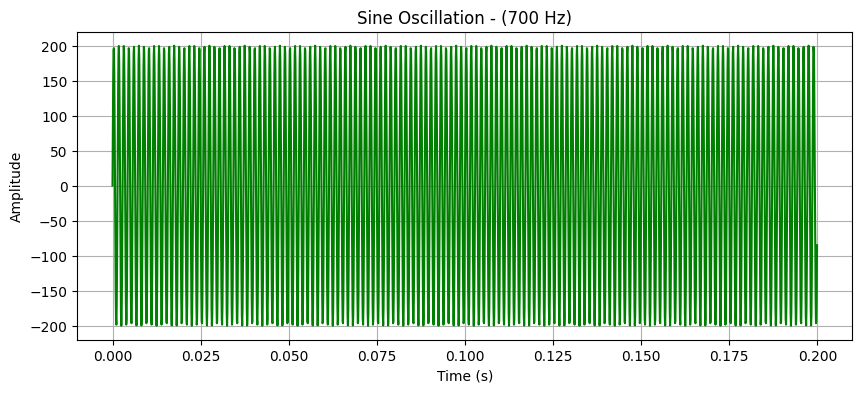

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters are:

f0_3 = 700  # Frequency
A3 = 200    # Amplitude
f_A = 10000 # Sampling_frequency
N = 2000    # Number_of_samples

# time vector
t = np.arange(N) / f_A

# sine oscillation
x_3 = A3 * np.sin(2 * np.pi * f0_3 * t)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t, x_3, color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Oscillation - (700 Hz)')
plt.grid(True)
plt.show()


#####(b)	Add up the oscillations you created and plot them on a graph. Label and format your graph accordingly.

In [124]:
# Given parameters

#Frequencys are,
f0_1 = 100
f0_2 = 300
f0_3 = 700
# Amplitudes are,
A1 = 50
A2 = 100
A3 = 200

# Sampling frequency
f_A = 10000

# Number of samples
N = 2000

# Create time vector
t = np.arange(N) / f_A

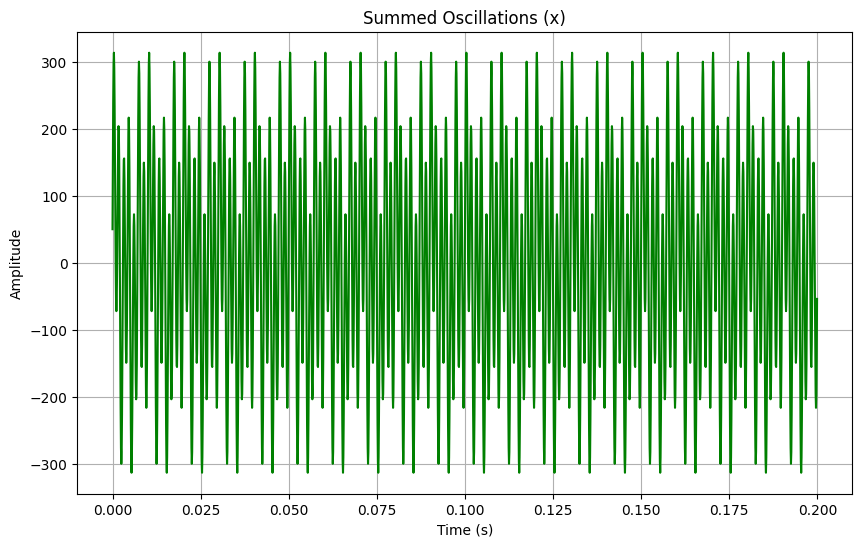

In [125]:
# Create individual oscillations
x_1 = A1 * np.cos(2 * np.pi * f0_1 * t)
x_2 = A2 * np.sin(2 * np.pi * f0_2 * t)
x_3 = A3 * np.sin(2 * np.pi * f0_3 * t)

# Sum the oscillations
x = x_1 + x_2 + x_3

# Plot the summed oscillation
plt.figure(figsize=(10, 6))
plt.plot(t, x, color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Summed Oscillations (x)')

plt.grid(True)
plt.show()


#####(c)	Find the frequencies and amplitudes of the signal created in subtask (b) using your DFT function and plot your result in the frequency domain in a figure. Label and format your diagram accordingly.

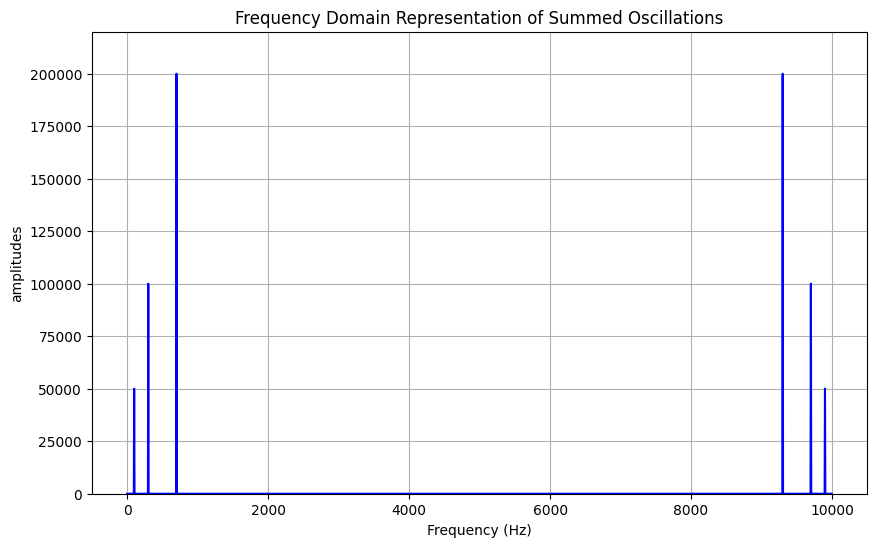

In [129]:
def dft(signal):
    N = len(signal)
    dft_result = np.zeros(N, dtype=np.complex_)
    for k in range(N):
        for n in range(N):
            dft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return dft_result

# Sum the oscillations
x = x_1 + x_2 + x_3

# DFT
dft_result = dft(x)

# DFT components frequencies
frequencies = np.arange(N) * f_A / N

# DFT components (amplitudes)
amplitudes = np.abs(dft_result)

# Plot the result in the frequency domain
plt.figure(figsize=(10, 6))
plt.plot(frequencies, amplitudes , color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('amplitudes')
plt.title('Frequency Domain Representation of Summed Oscillations')
plt.grid(True)
plt.ylim(0, max(amplitudes) * 1.1)  # Set y-axis limit
plt.show()


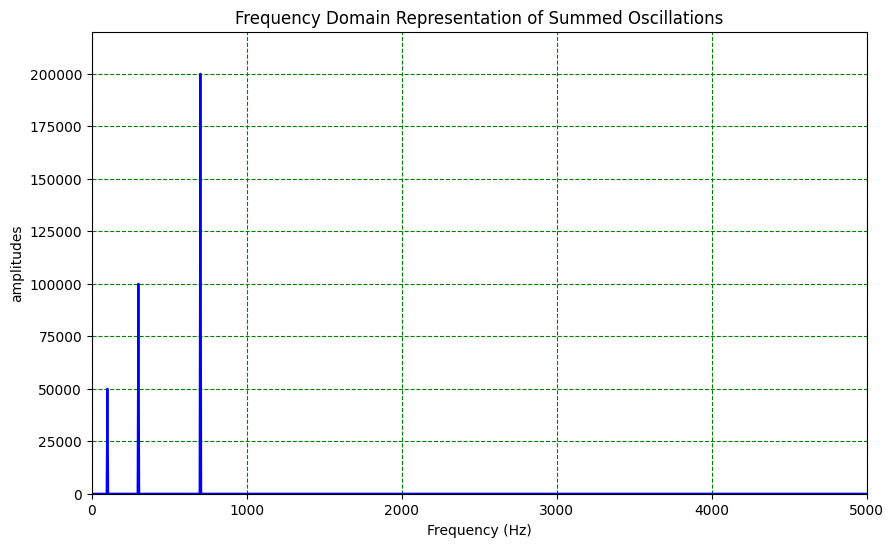

In [131]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(frequencies, amplitudes , color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('amplitudes')
plt.title('Frequency Domain Representation of Summed Oscillations')
plt.grid(True, linestyle = 'dashed', color= 'g')
plt.xlim(0, f_A / 2) # Show only positive frequencies
plt.ylim(0, max(amplitudes) * 1.1 ) # Set y-axis limit
plt.show()


# (4.2) Creating simple filters and applying them in the frequency domain.
In the following, the respective signals from (4.1b) are to be filtered in the frequency domain.


#####(a) Define a rectangular filter as shown below in PYTHON in the frequency domain to filter out all the oscillation less than  f_(0 )= 150 Hz and show by means of frequency analysis that the signal is filtered, whereby the higher oscillations are preserved. Graph your result in the frequency domain.How is this filter form called?  


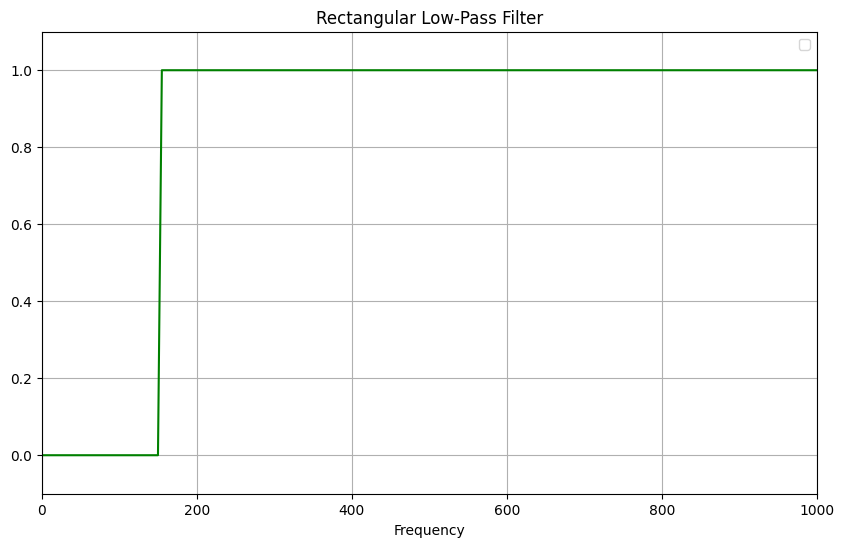

In [166]:

low_pass_filter = np.where( frequencies <= 150, 0, 1)

# Plot the rectangular low-pass filter
plt.figure(figsize=(10, 6))
plt.plot(frequencies, low_pass_filter, color='green')
plt.xlabel('Frequency')
plt.title('Rectangular Low-Pass Filter')
plt.grid(True)
plt.xlim(0, 1000)  # Adjust x-axis limits for better visualization
plt.legend()
plt.show()


#####(b)	In the frequency domain, define a rectangular filter as shown below in PYTHON to filter the oscillations between 250 Hz to 350 Hz and show by frequency analysis that the signal is filtered, while the other oscillations (lower and high frequencies) are preserved. Graph your result in the frequency domain. How is this filter form called?


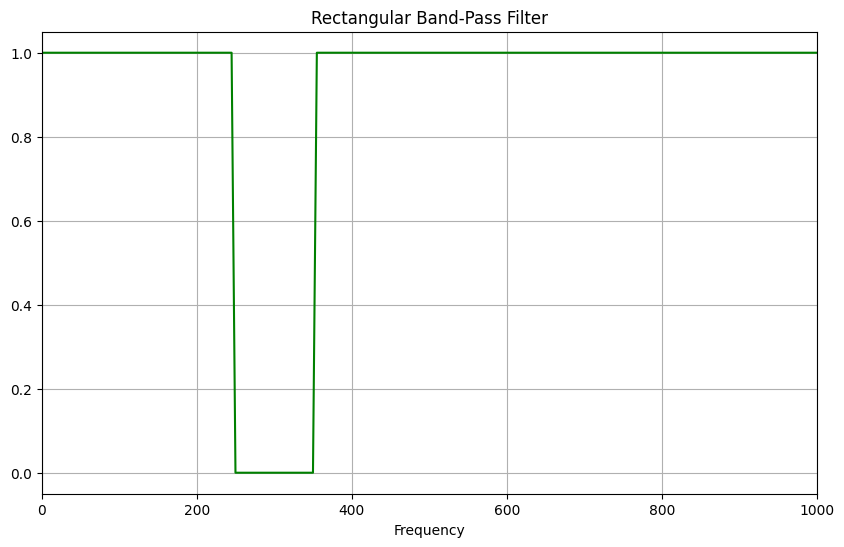

In [173]:

band_pass_filter = np.where((frequencies >= 250) & (frequencies <=  350), 0, 1)

# Plot the rectangular band-pass filter
plt.figure(figsize=(10, 6))
plt.plot(frequencies, band_pass_filter, color='green')
plt.xlabel('Frequency')
plt.title('Rectangular Band-Pass Filter')
plt.grid(True)
plt.xlim(0, 1000)
plt.show()

##### (c)	In the frequency domain, define a rectangular filter as shown below in PYTHON to filter the oscillations having frequency higher than 650 Hz and show by frequency analysis that the signal is filtered, while the other oscillations should be preserved. Graph your result in the frequency domain. How is this filter form called?


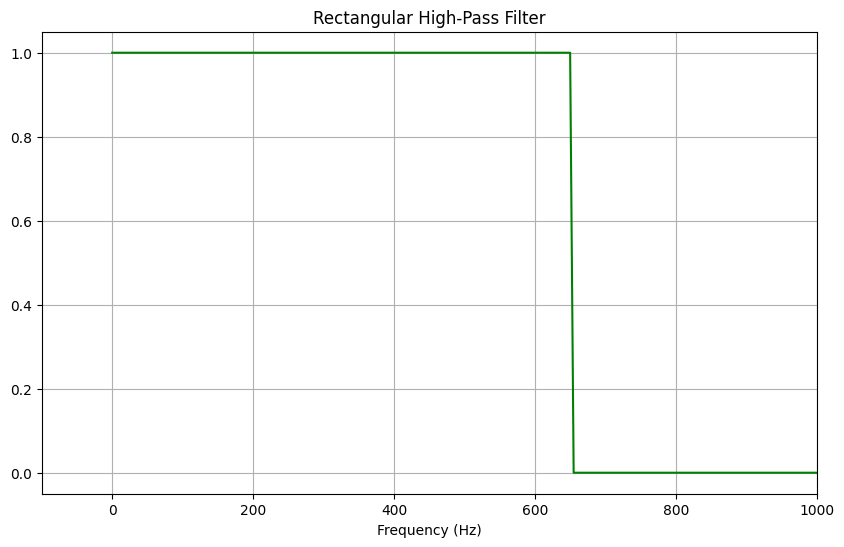

In [176]:
cutoff_frequency = 650

high_pass_filter = np.where(frequencies > 650, 0, 1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(frequencies, high_pass_filter, color='green')
plt.xlabel('Frequency (Hz)')
plt.title('Rectangular High-Pass Filter')
plt.grid(True)
plt.xlim(-100, 1000)
plt.show()

# 4.3 Back transformation of filtered signals into the time domain.

 In the following, the respective filtering from task (4.2) are to be examined in the time domain. For this purpose, create a function in PYTHON to calculate the inverse DFT to transform your filtered signal into the time domain.

*   DFT: DFT{x(k)}=X(m)=∑_(n=0)^(N-1)▒〖x(n)e^(-j2π nm/N) 〗 or after
*   inserting:   e^ja=cos⁡(a)+j sin(a)
*   Inverse DFT: IDFT{X(k)}=x(n)=1/N ∑_(m=0)^(N-1)▒〖X(m)e^(j2π nm/N) 〗



##### (a)	Create your own function to calculate the inverse DFT in PYTHON. The function should be able to pass any signals, whereby the output of the function should be the IDFT result.

In [183]:

def i_dft(signal):

    N = len(signal)
    idft_result = np.zeros(N, dtype=np.complex128)  # Initialize IDFT result array

    for n in range(N):
        for m in range(N):
            idft_result[n] += signal[m] * np.exp(2j * np.pi * m * n / N)

    idft_result /= N  # Normalize by dividing by N

    return idft_result


#####(b) Transform your filtered signal from (4.2a) into the time domain using the inverse DFT and show the result in the time domain together with the oscillation from (4.1b). Check the plausibility of your result.


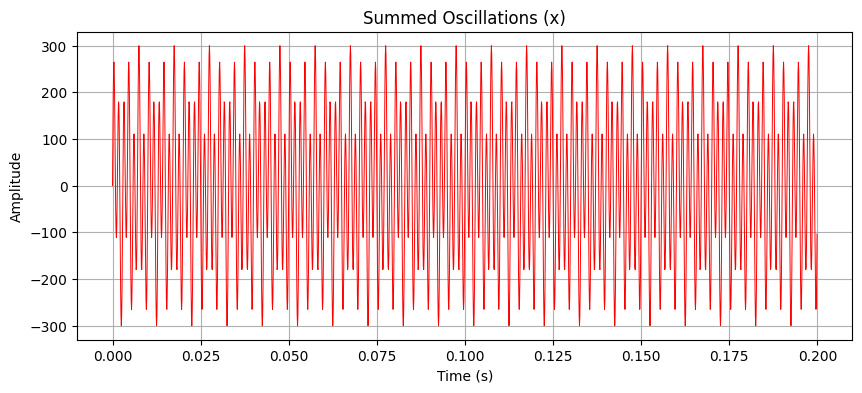

In [221]:
idft_result_1 = i_dft(low_pass_filter)


# Plot the summed oscillation
plt.figure(figsize=(10, 4))
plt.plot(t, np.real(idft_result_1), 'k', linewidth=0)
plt.plot(t, x_2 + x_3, color='r', linewidth=0.7)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Summed Oscillations (x)')

plt.grid(True)
plt.show()



#####(c)	Transform your filtered signal from (4.2b) into the time domain using the inverse DFT and show the result in the time domain together with the oscillation from (4.1b). Check the plausibility of your result.


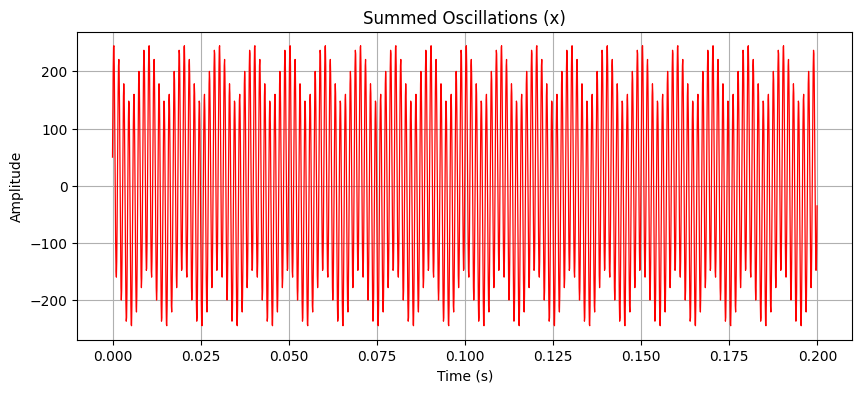

In [219]:
idft_result_2 = i_dft(band_pass_filter)


# Plot the summed oscillation
plt.figure(figsize=(10, 4))
plt.plot(t, np.real(idft_result_2), 'k', linewidth = 0)
plt.plot(t, x_1 + x_3, color='r', linewidth=0.9)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Summed Oscillations (x)')

plt.grid(True)
plt.show()


#####(d)	Transform your filtered signal from (4.2c) into the time domain using the inverse DFT and show the result in the time domain together with the oscillation from (4.1b). Check the plausibility of your result.


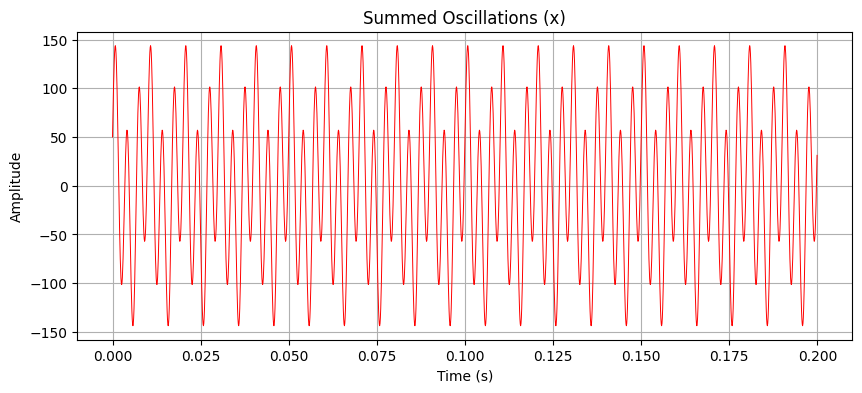

In [216]:
idft_result_3 = i_dft(high_pass_filter)


# Plot the summed oscillation
plt.figure(figsize=(10, 4))
plt.plot(t, np.real(idft_result_3), 'k', linewidth=0)
plt.plot(t, x_1 + x_2 , color='r', linewidth=0.7)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Summed Oscillations (x)')

plt.grid(True)
plt.show()

